# COMPARESTARS.IPYNB -- Compare properties of different stellar solutions

In [1]:
### IMPORT STUFF ###

import numpy as np
import matplotlib.pyplot as plt
from ns import ns

G = 6.674e-8 # Newton's constant in cgs units
c = 2.998e10 # speed of light in cm/s
Msun = 1.988e33 # solar mass in g
rhonuc = 2.7e14 # nuclear density in g/cm^3

In [2]:
### PROVIDE INPUT PARAMETERS ###

eosnames = ["APR4","NL3","MS1B"] # SET EQUATIONS OF STATE HERE
rhocs = np.linspace(1.,5.,10) # SET CENTRAL MASS DENSITIES HERE

eospath = "./" # path to EoS data files
stp = 1e-4 # starting step for numerical integration
pts = 5e3 # number of points at which to evaluate numerical integration
tol = 1e-6 # tolerance for surface finding algorithm

In [3]:
### RUN CODE ###

Mlist = np.zeros((len(eosnames),len(rhocs)))
Rlist = np.zeros((len(eosnames),len(rhocs)))
rslist = []
muslist = []
mslist = []
lengths = [0]

i = 0
for eosname in eosnames:
    j = 0
    print 'Integrating {0}'.format(eosname)
    for rhoc in rhocs:
        [props, rs, mus, ms] = ns(eosname,rhoc,pts,eospath,stp,tol)
        [Mlist[i,j], Rlist[i,j]] = props
        lengths = np.append(lengths,len(rs))
        rslist = np.append(rslist,rs)
        muslist = np.append(muslist,mus)
        mslist = np.append(mslist,ms)

        j = j+1
    i = i+1
 


Integrating APR4


ns.py:52: RuntimeWarning: divide by zero encountered in double_scalars
  return -(mu+p(mu))*(m+4.*np.pi*r**3*p(mu))/(dpdmu(mu)*r**2*(1.-2.*m/r)) # note that we are using G=c=1 units in this code
ns.py:52: RuntimeWarning: invalid value encountered in double_scalars
  return -(mu+p(mu))*(m+4.*np.pi*r**3*p(mu))/(dpdmu(mu)*r**2*(1.-2.*m/r)) # note that we are using G=c=1 units in this code


Integrating NL3


/opt/anaconda2/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Integrating MS1B


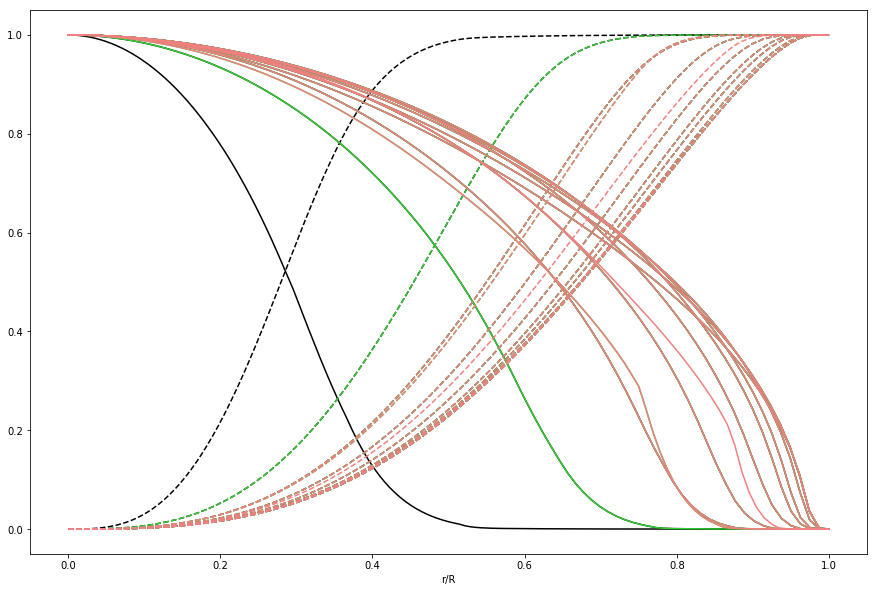

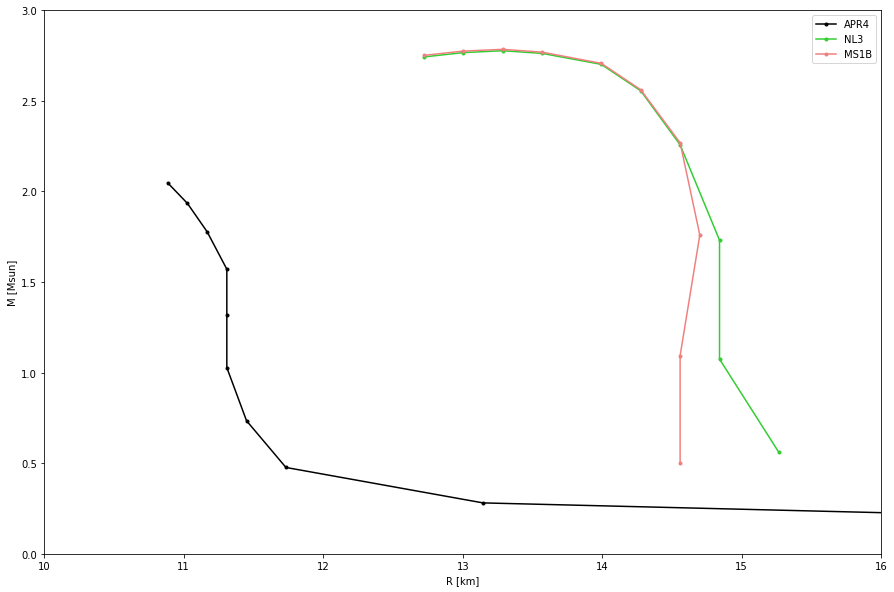

In [4]:
### OUTPUT RESULTS ###

colors = ['black','limegreen','lightcoral']

plt.figure(1,(15,10)) # plot mu(r), p(r), m(r)
for i in np.arange(len(eosnames)):
    for j in np.arange(len(rhocs)):
        k = i + j
        start = int(np.sum(lengths[:k+1]))
        end = int(np.sum(lengths[:k+2]))
        rpts = rslist[start:end]/rslist[end-1]
        mupts = muslist[start:end]/muslist[start]
        mpts = mslist[start:end]/mslist[end-1]
        plt.plot(rpts,mupts,c=colors[i],ls='solid',label=rhocs[j])
        plt.plot(rpts,mpts,c=colors[i],ls='dashed',label=rhocs[j])
plt.xlabel('r/R')

plt.figure(2,(15,10)) # plot mu(r), p(r), m(r)
for i in np.arange(len(eosnames)):
    plt.plot(Mlist[i],Rlist[i],c=colors[i],marker='.',label=eosnames[i])
plt.ylabel('M [Msun]')
plt.xlabel('R [km]')
plt.ylim(0.,3.)
plt.xlim(10.,16.)
plt.legend()

plt.show()
